In [1]:
# !wget https://download.pangaea.de/dataset/920895/files/Dataset.rar

In [2]:
# !apt-get install -y unrar


In [3]:
# import os

# # Path to your RAR file
# rar_file_path = '/kaggle/input/annotations-vegetable/Dataset'

# # Destination folder where you want to extract files
# extract_folder = '/kaggle/working/'

# # Create the destination folder if it doesn't exist
# os.makedirs(extract_folder, exist_ok=True)

# # Use the unrar command to extract the RAR file
# os.system(f'unrar x "{rar_file_path}" "{extract_folder}"')

# import zipfile

# def unzip_file(zip_file_path, extract_to_path):
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to_path)

# # Example usage:
# zip_file_path =  './annotations-vegetable/Dataset'
# extract_to_path = '/kaggle/working/'

# unzip_file(zip_file_path, extract_to_path)

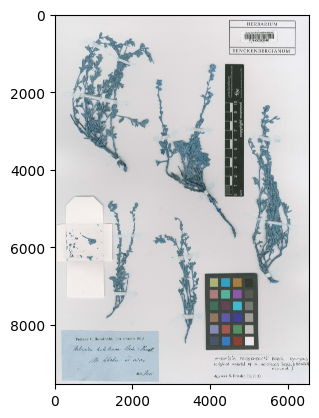

In [4]:
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
image_path = '/kaggle/input/annotations-vegetable/Dataset/Annotations/FR-0030846.jpg'
image = cv2.imread(image_path)

# # Check the data type
# print("Image Data Type:", image.dtype)

# Convert image data to float
image_float = image.astype(float)

# # Display the image
plt.imshow(image)
plt.show()


In [5]:
!mv /kaggle/input/annotations-vegetable/Dataset .

mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436955724.xml': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/FR-0001317.jpg': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436962394.jpg': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436964600.jpg': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436968774.xml': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436956269.jpg': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436968885.xml': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/436952293.xml': Read-only file system
mv: cannot remove '/kaggle/input/annotations-vegetable/Dataset/Annotations/FR-0004657.jpg': Rea

In [6]:
!cat /kaggle/working/Dataset/Annotations/FR-0036395.xml
# import xml.etree.ElementTree as ET

# # Specify the path to your XML file
# xml_file_path = '/kaggle/working/Annotations/FR-0036395.xml'

# # Parse the XML file
# tree = ET.parse(xml_file_path)
# root = tree.getroot()

# # Access specific elements and attributes based on your XML structure
# for object_elem in root.findall('object'):
#     # Extract class label
#     class_label = object_elem.find('name').text
    
#     # Extract bounding box coordinates
#     bbox = object_elem.find('bndbox')
#     xmin = int(bbox.find('xmin').text)
#     ymin = int(bbox.find('ymin').text)
#     xmax = int(bbox.find('xmax').text)
#     ymax = int(bbox.find('ymax').text)
    
#     print(f"Class: {class_label}, Bounding Box: {xmin}, {ymin}, {xmax}, {ymax}")


<annotation verified="yes">
	<folder>HerbarScansFR</folder>
	<filename>FR-0036395.jpg</filename>
	<path>E:\SGN\HerbarScansFR\FR-0036395.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>6317</width>
		<height>9594</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>stem</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>2069</xmin>
			<ymin>2147</ymin>
			<xmax>3097</xmax>
			<ymax>2993</ymax>
		</bndbox>
	</object>
	<object>
		<name>stem</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>2514</xmin>
			<ymin>4392</ymin>
			<xmax>3169</xmax>
			<ymax>6431</ymax>
		</bndbox>
	</object>
	<object>
		<name>flower</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>3215</xmin>
			<ymin>2753</ymin>
			<xmax>3616</xmax>
			<ymax>3206</ymax>
		</bndbox>
	</object>
	<ob

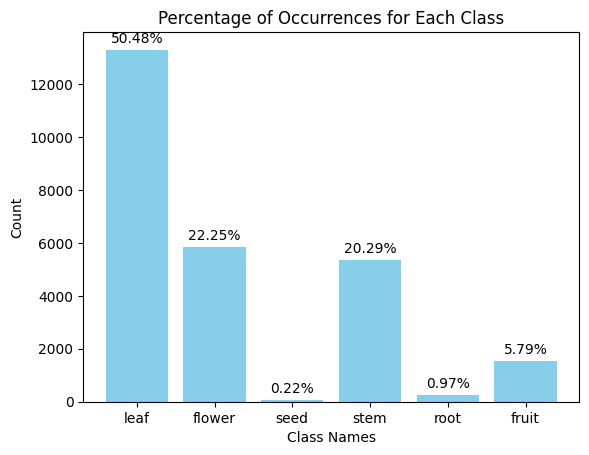

In [7]:
import os
import xml.etree.ElementTree as ET

# Directory containing XML annotation files
xml_dir ="/kaggle/working/Dataset/Annotations"

# Initialize class_name_to_id_mapping
class_name_to_id_mapping = {"leaf": 0, "flower": 0, "seed": 0, "stem": 0, "root": 0, "fruit": 0}

# Iterate through each XML file in the directory
for filename in os.listdir(xml_dir):
    if filename.endswith(".xml"):
        xml_path = os.path.join(xml_dir, filename)

        # Parse XML annotations
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Iterate through objects in the XML file
        for obj in root.findall('.//object'):
            label = obj.find('name').text

            # Check if the label is in the mapping
            if label in class_name_to_id_mapping:
                # Increment the count for the corresponding class
                class_name_to_id_mapping[label] += 1

# Print the resulting mapping
import matplotlib.pyplot as plt

# Assuming you already have class_name_to_id_mapping populated

# Extract class names and counts
class_names = list(class_name_to_id_mapping.keys())
class_counts = list(class_name_to_id_mapping.values())

# Calculate percentages
total_count = sum(class_counts)
class_percentages = [count / total_count * 100 for count in class_counts]

# Plot the bar plot with percentages
fig, ax = plt.subplots()
bars = ax.bar(class_names, class_counts, color='skyblue')

# Annotate the bars with percentages
for bar, percentage in zip(bars, class_percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Percentage of Occurrences for Each Class')
plt.show()



In [8]:
print(class_name_to_id_mapping)

{'leaf': 13299, 'flower': 5863, 'seed': 57, 'stem': 5347, 'root': 255, 'fruit': 1526}


In [9]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [10]:

from ultralytics import YOLO

from IPython.display import display, Image

In [11]:
# Function to get the data from XML Annotation

import xml.etree.ElementTree as ET
import cv2
import numpy as np

def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [12]:
print(extract_info_from_xml('/kaggle/working/Dataset/Annotations/436956395.xml'))

{'bboxes': [{'class': 'flower', 'xmin': 410, 'ymin': 523, 'xmax': 439, 'ymax': 544}, {'class': 'flower', 'xmin': 397, 'ymin': 518, 'xmax': 421, 'ymax': 554}, {'class': 'flower', 'xmin': 410, 'ymin': 488, 'xmax': 432, 'ymax': 514}, {'class': 'flower', 'xmin': 369, 'ymin': 488, 'xmax': 397, 'ymax': 523}, {'class': 'flower', 'xmin': 334, 'ymin': 388, 'xmax': 373, 'ymax': 404}, {'class': 'flower', 'xmin': 169, 'ymin': 148, 'xmax': 199, 'ymax': 172}, {'class': 'leaf', 'xmin': 195, 'ymin': 136, 'xmax': 241, 'ymax': 177}, {'class': 'leaf', 'xmin': 156, 'ymin': 73, 'xmax': 204, 'ymax': 163}, {'class': 'leaf', 'xmin': 149, 'ymin': 168, 'xmax': 204, 'ymax': 312}, {'class': 'leaf', 'xmin': 96, 'ymin': 152, 'xmax': 179, 'ymax': 205}, {'class': 'leaf', 'xmin': 408, 'ymin': 70, 'xmax': 654, 'ymax': 507}, {'class': 'leaf', 'xmin': 325, 'ymin': 350, 'xmax': 341, 'ymax': 388}, {'class': 'leaf', 'xmin': 33, 'ymin': 341, 'xmax': 339, 'ymax': 483}, {'class': 'leaf', 'xmin': 17, 'ymin': 484, 'xmax': 349, '

In [13]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"leaf": 0,
                           "flower": 1,
                           "seed": 2,
                           "stem": 3,
                           "root":4,
                           "fruit":5}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("/kaggle/working/Dataset/Annotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [14]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)
# Get the annotations
annotations = [os.path.join('/kaggle/working/Dataset/Annotations', x) for x in os.listdir('/kaggle/working/Dataset/Annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('/kaggle/working/Dataset/Annotations', x) for x in os.listdir('/kaggle/working/Dataset/Annotations') if x[-3:] == "txt"]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████| 856/856 [00:00<00:00, 1182.24it/s]


In [15]:
# len(images)

In [16]:
# Read images and annotations
images = [os.path.join('/kaggle/working/Dataset/Annotations', x) for x in os.listdir('/kaggle/working/Dataset/Annotations')if x[-3:] == "jpg"]
annotations = [os.path.join('/kaggle/working/Dataset/Annotations', x) for x in os.listdir('/kaggle/working/Dataset/Annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [17]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('valid')
os.mkdir('valid/images')
os.mkdir('valid/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [18]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/kaggle/working/train/images')
move_files_to_folder(val_images, '/kaggle/working/valid/images/')
move_files_to_folder(test_images,  '/kaggle/working/test/images/')
move_files_to_folder(train_annotations, '/kaggle/working/train/labels/')
move_files_to_folder(val_annotations, '/kaggle/working/valid/labels/')
move_files_to_folder(test_annotations,  '/kaggle/working/test/labels/')

In [19]:
# import shutil

# src_path = r"/kaggle/input/dataset/data.yaml"
# dst_path = r"/kaggle/working/"
# shutil.copy(src_path, dst_path)
# print('Copied')

In [20]:


text = """
train: /kaggle/working/train
val: /kaggle/working/test

names: ["leaf","flower","seed","stem","root","fruit"]
nc: 6

train: /kaggle/working/train/images
val: /kaggle/working/valid/images
test : /kaggle/working/test/


focal_loss: 1
counters_per_class: 13299, 5863, 57, 5347, 255, 1526
"""
with open("data.yaml", 'w') as file:
    file.write(text)



In [21]:
!cat data.yaml


train: /kaggle/working/train
val: /kaggle/working/test

names: ["leaf","flower","seed","stem","root","fruit"]
nc: 6

train: /kaggle/working/train/images
val: /kaggle/working/valid/images
test : /kaggle/working/test/


focal_loss: 1
counters_per_class: 13299, 5863, 57, 5347, 255, 1526


In [22]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')  # build from YAML and transfer weights


100%|██████████| 6.23M/6.23M [00:00<00:00, 21.3MB/s]



In [23]:
results = model.train(data="data.yaml", 
      name = 'licence_plate', epochs=100,batch = 24, 
      cache = True, iou = 0.45,
      augment=True, lr0=0.0001, optimizer='Adam')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=100, patience=50, batch=24, imgsz=640, save=True, cache=True, device=, workers=8, project=None, name=licence_plate, exist_ok=False, pretrained=False, optimizer=Adam, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, op

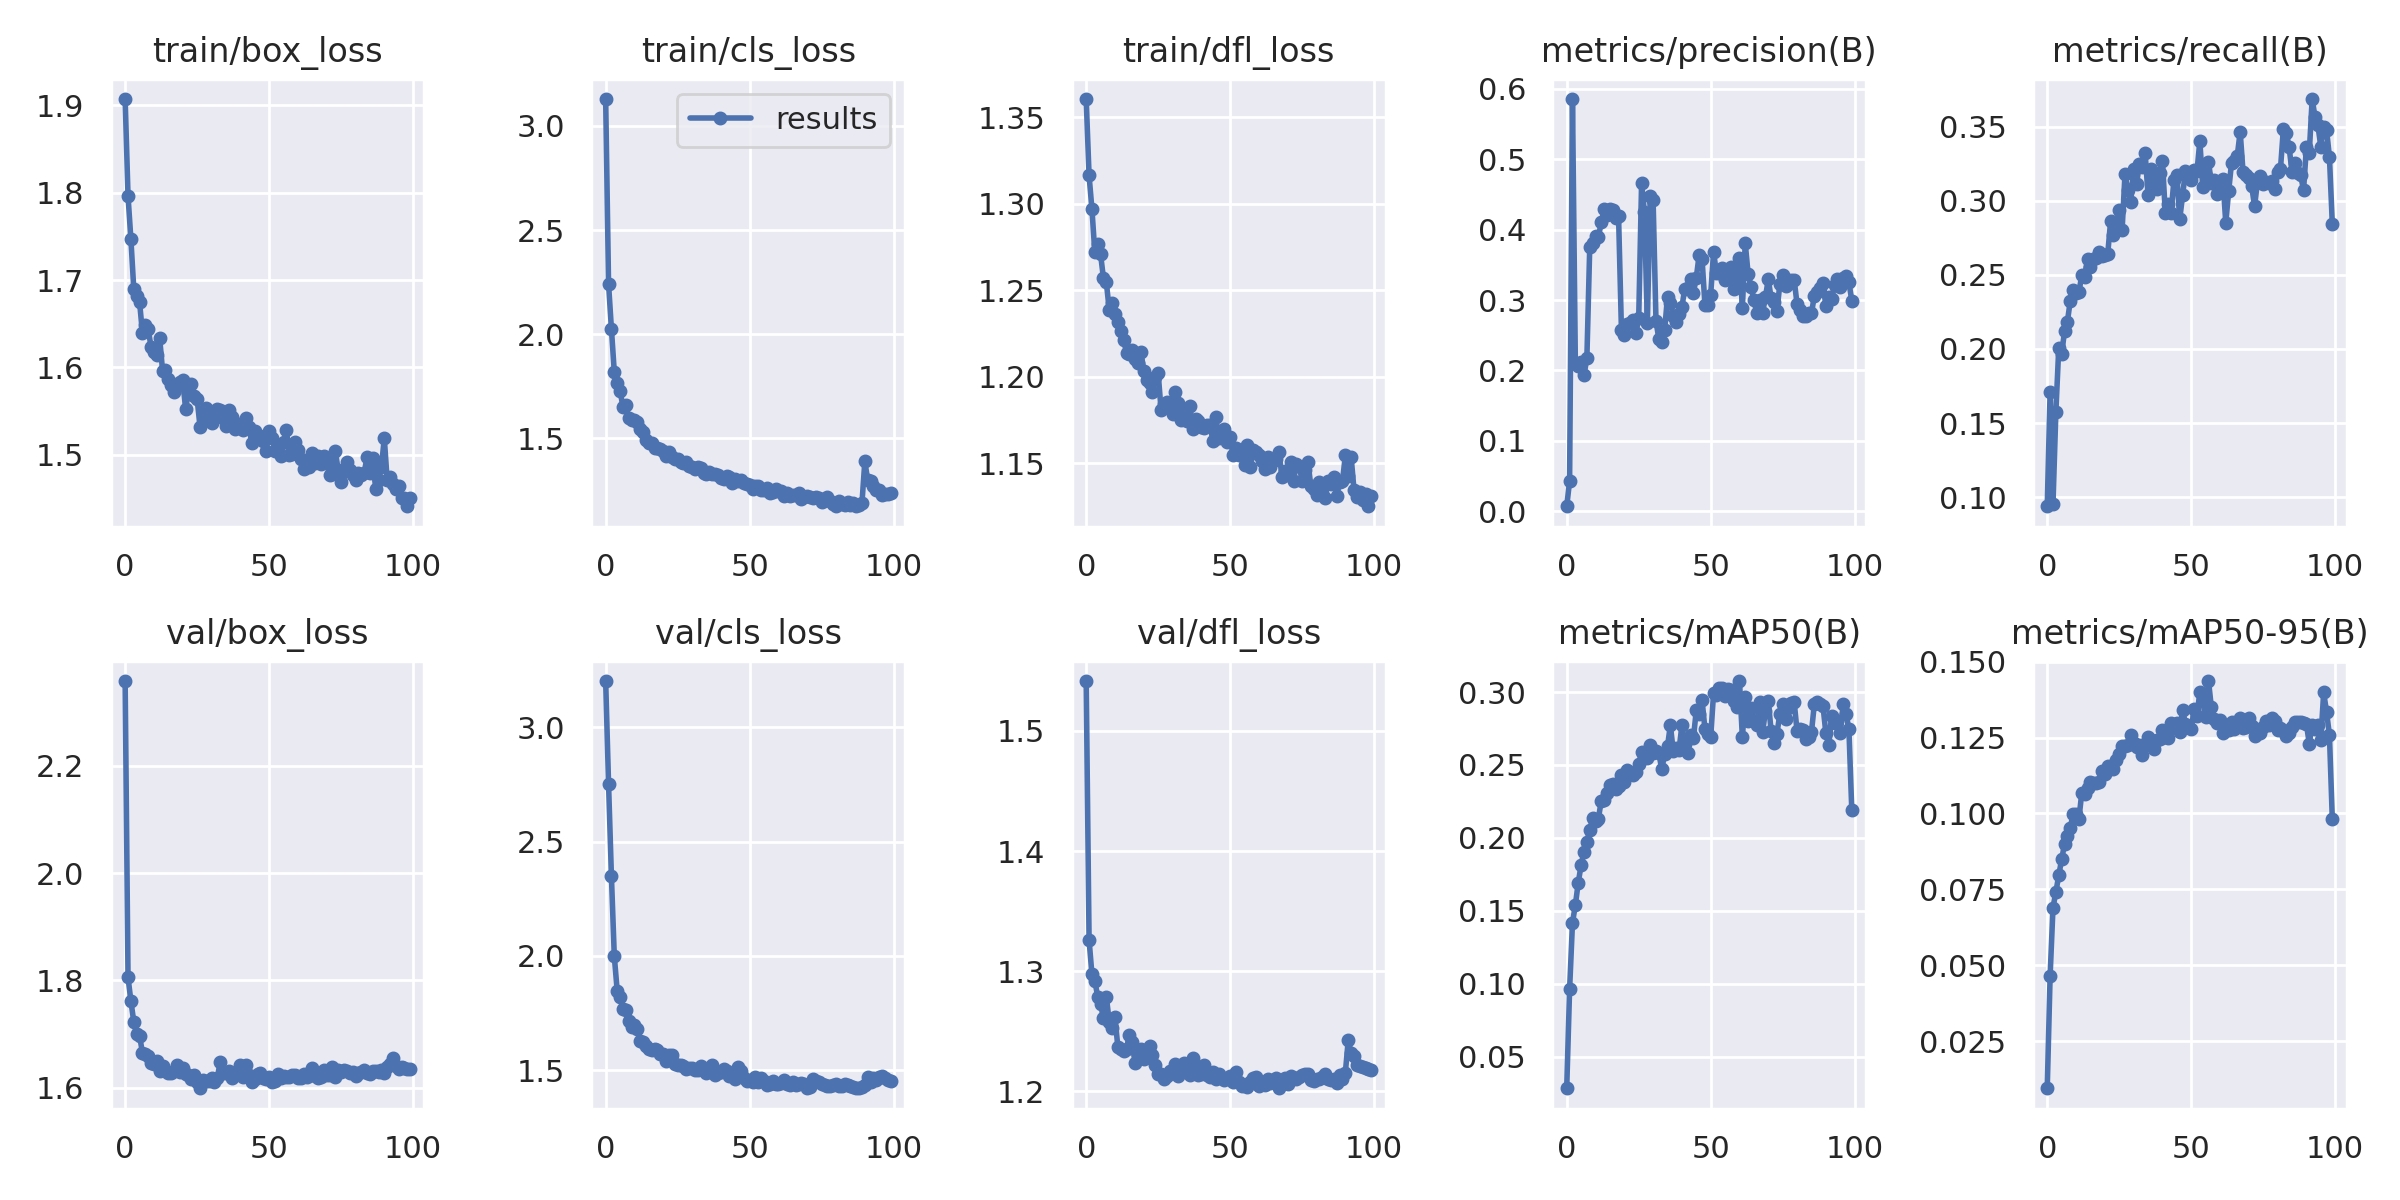

In [24]:
from IPython.display import display, Image
Image(filename="/kaggle/working/runs/detect/licence_plate/results.png", height=800)

GROUND TRUTH TRAINING DATA:


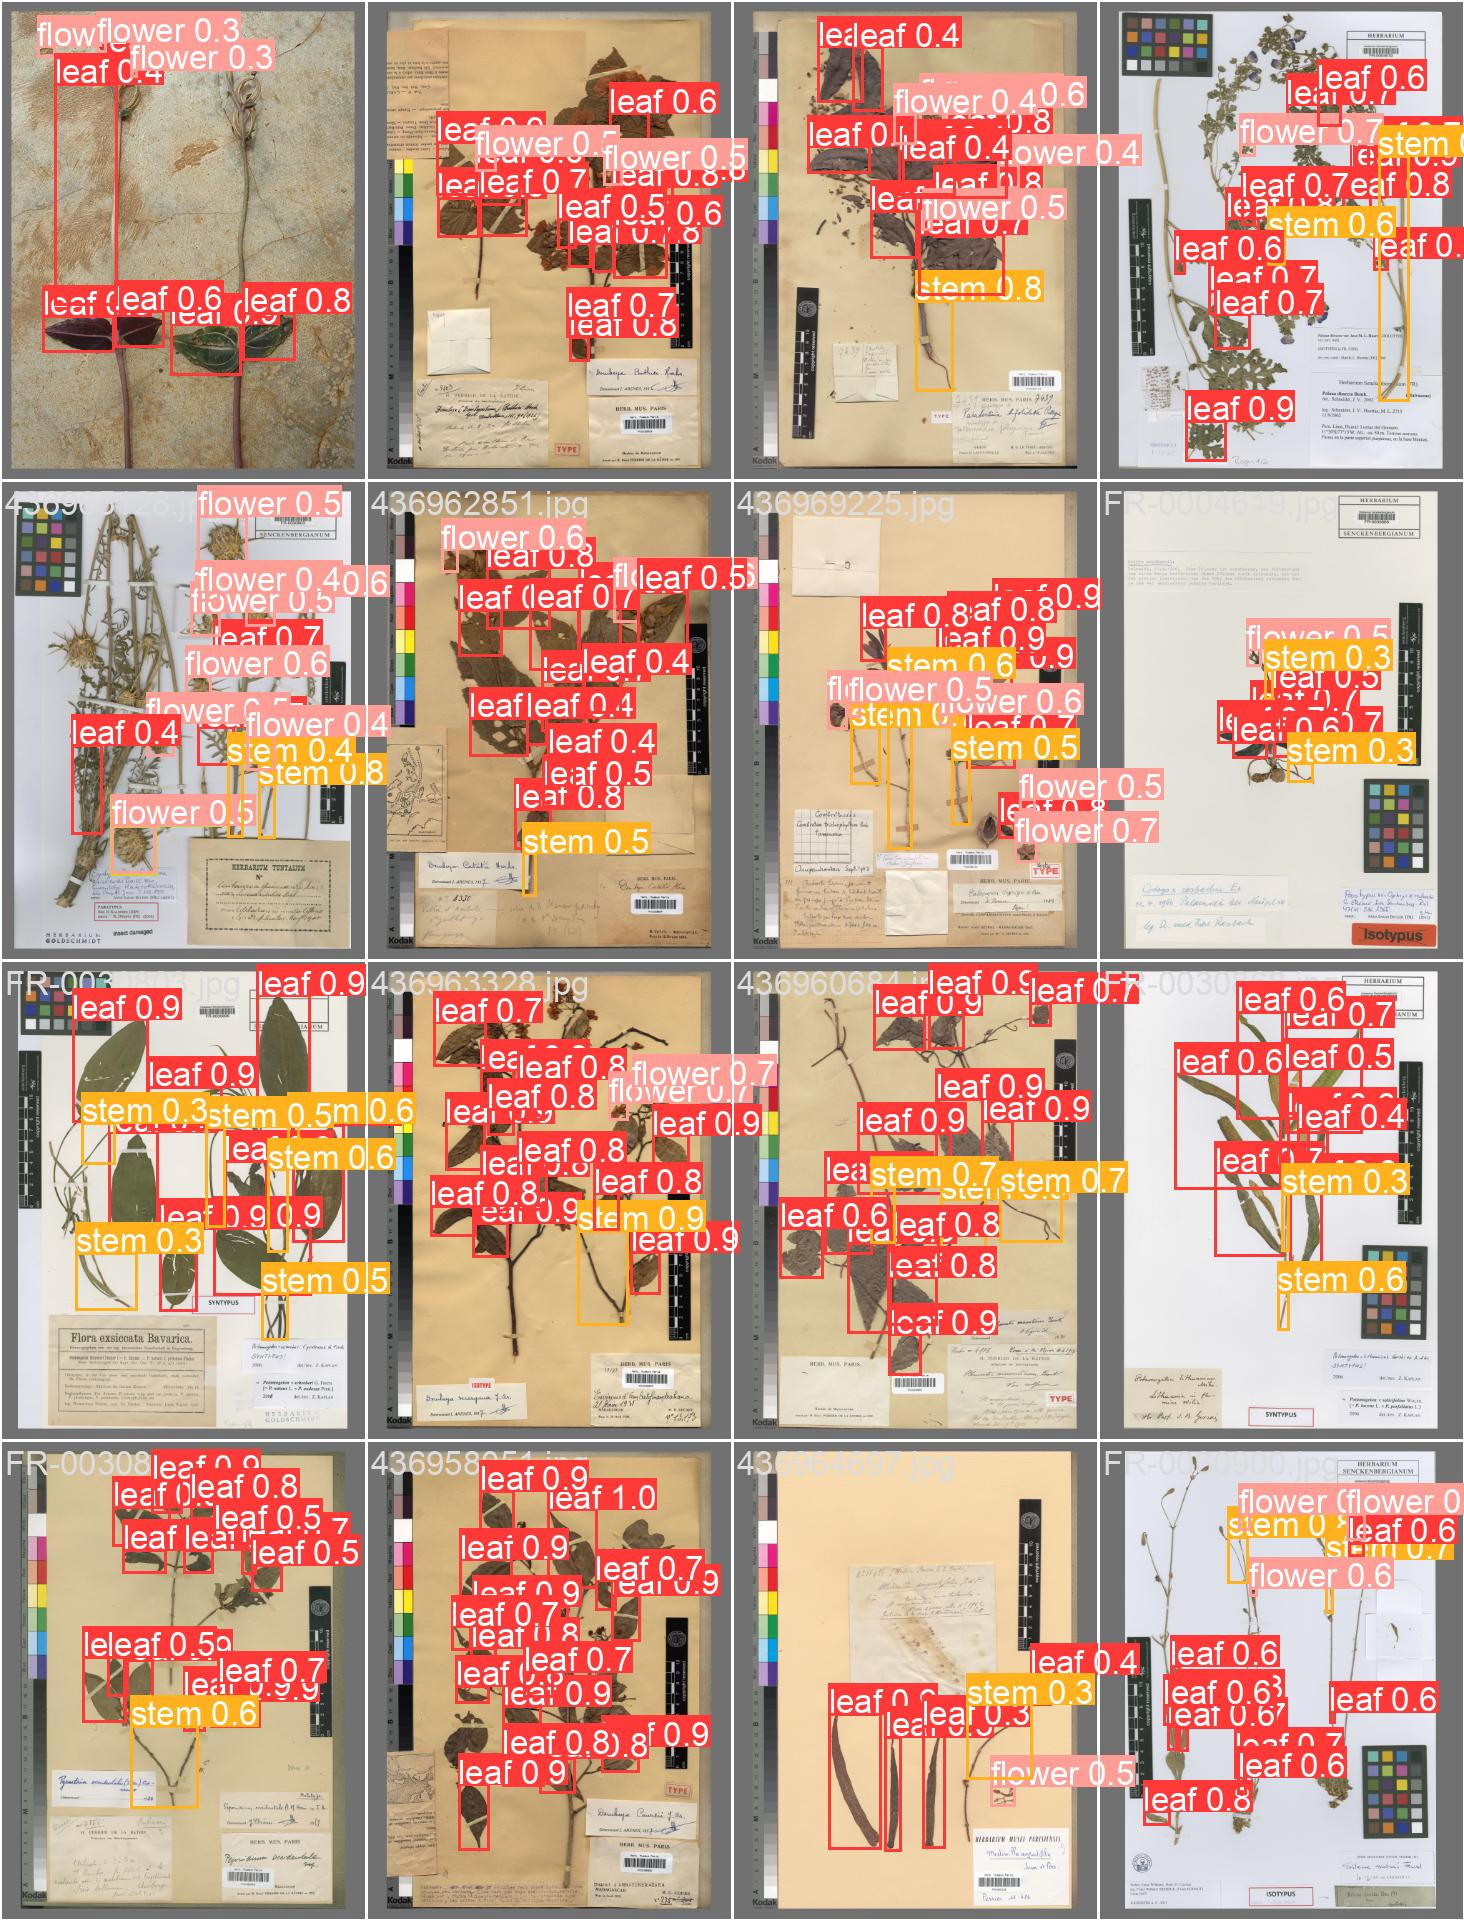

In [25]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/kaggle/working/runs/detect/licence_plate/val_batch0_pred.jpg', width=900)

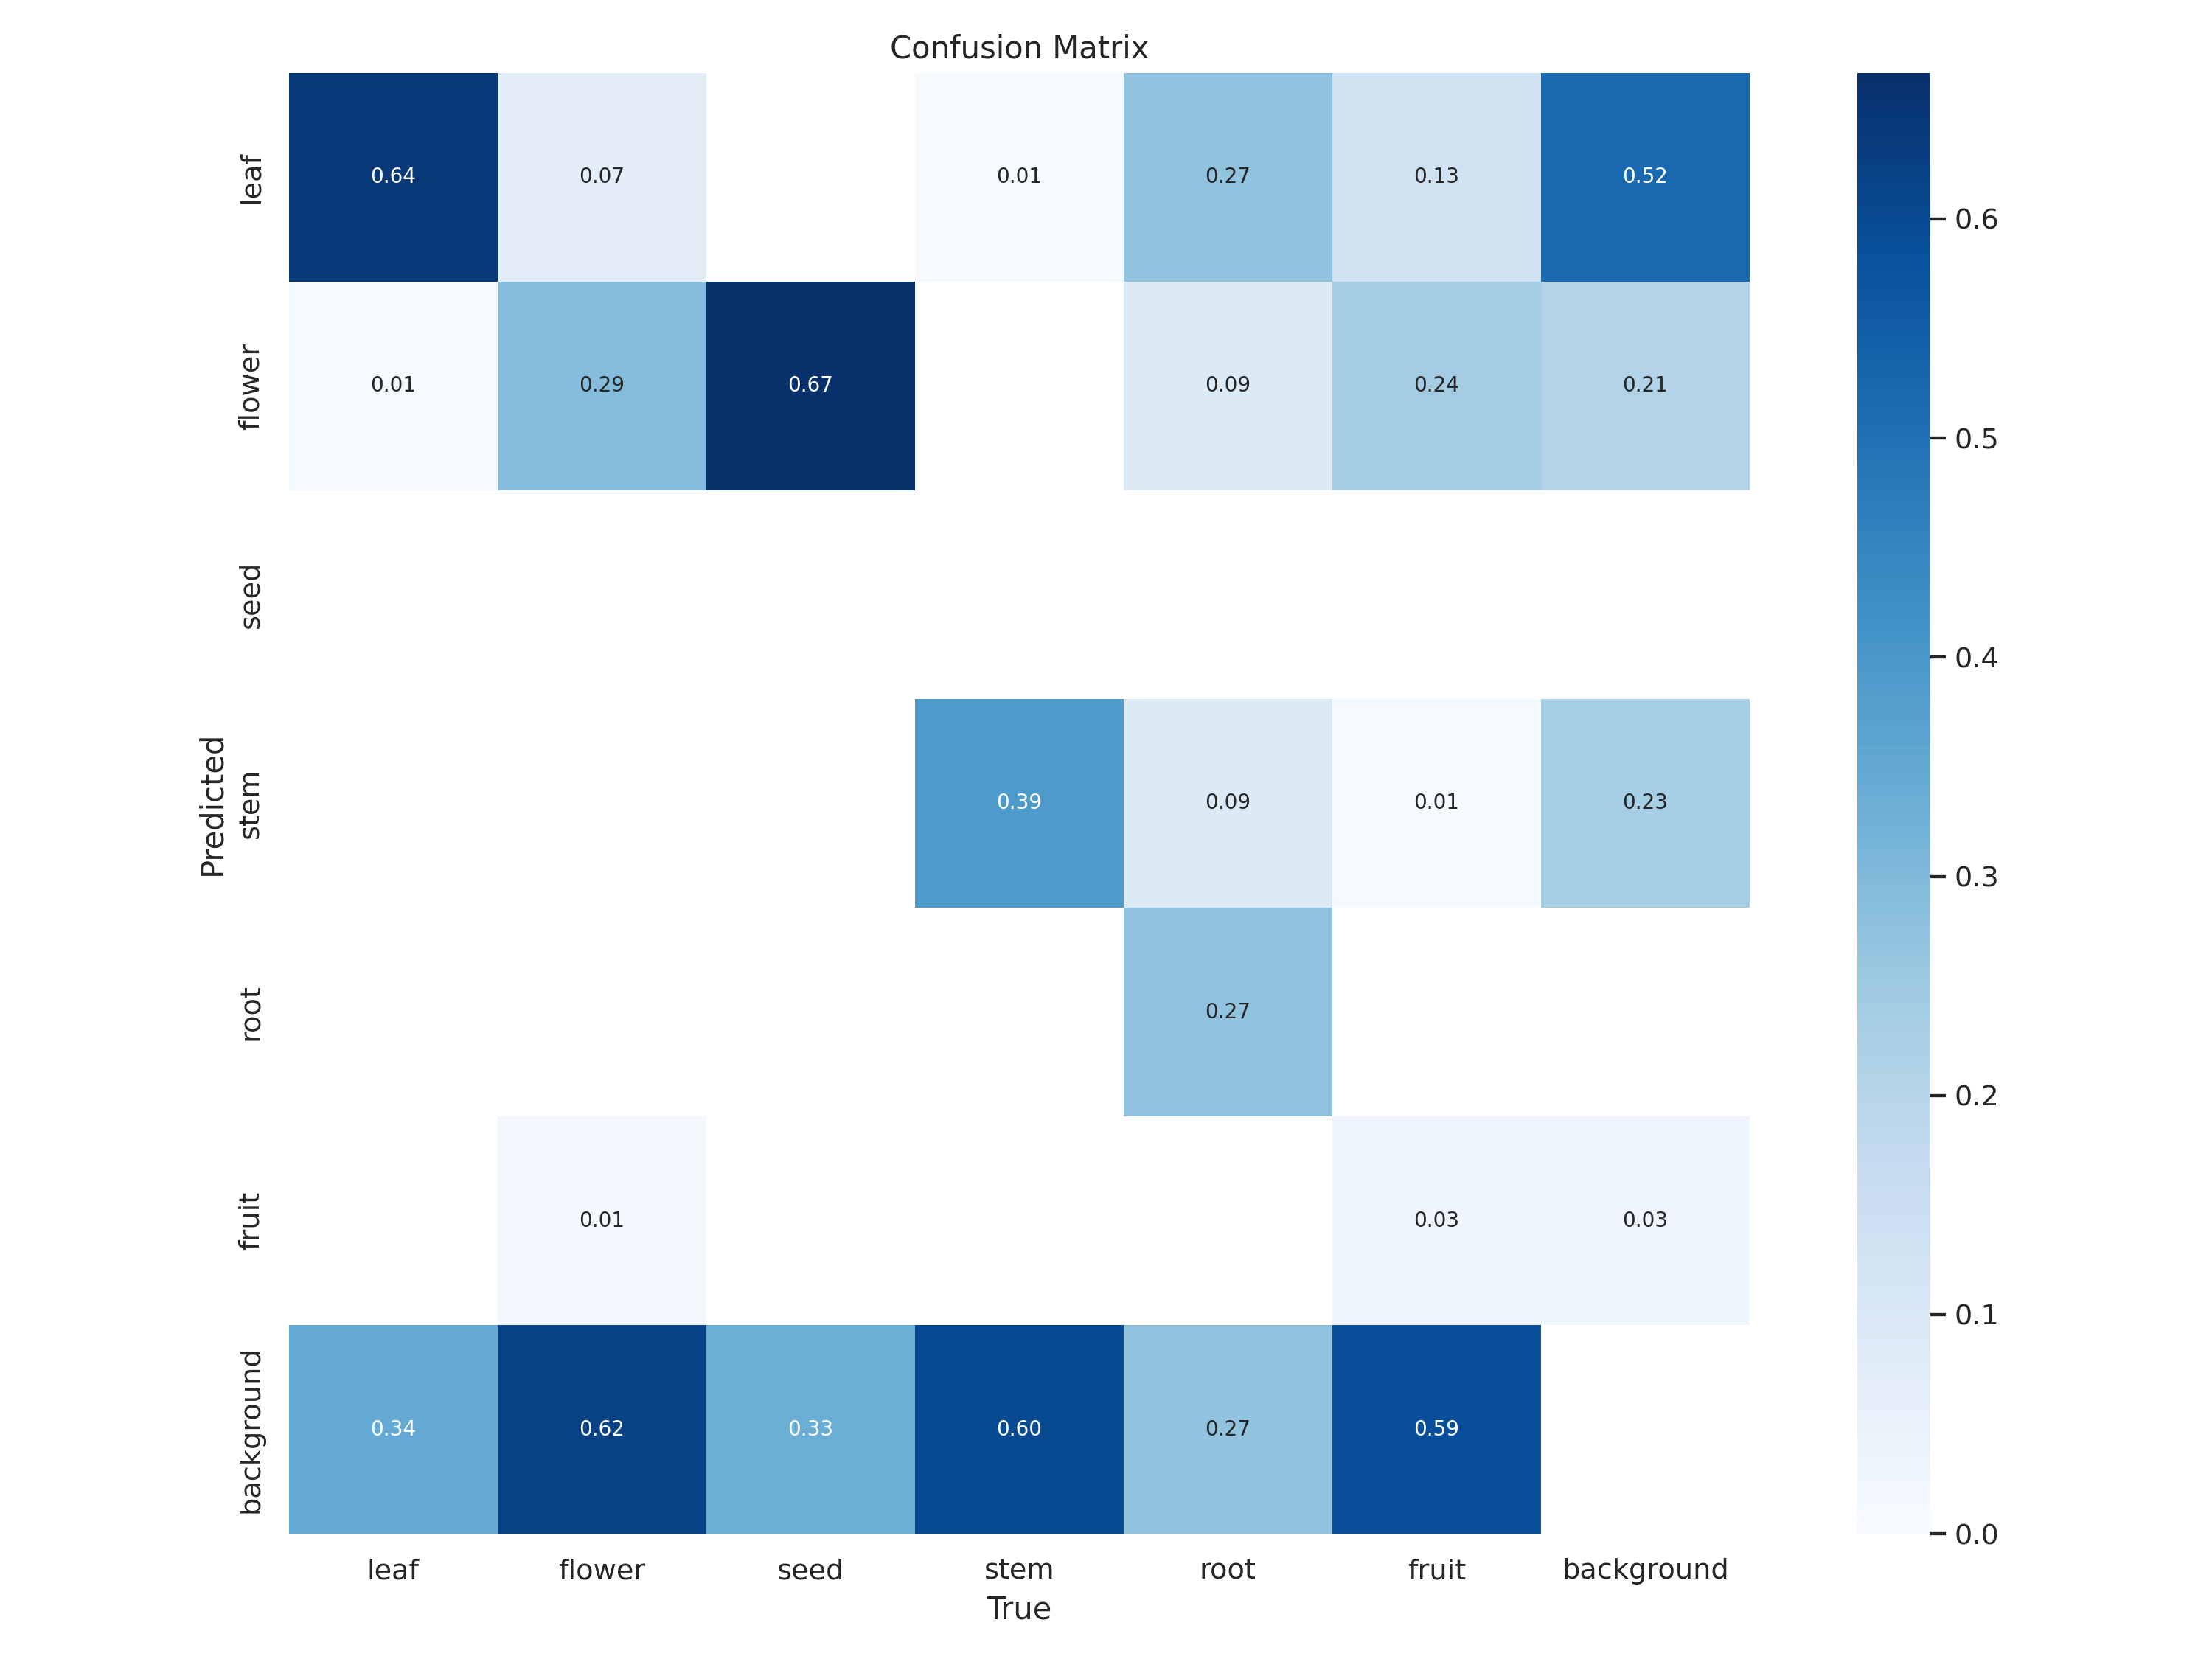

In [26]:
Image(filename='/kaggle/working/runs/detect/licence_plate/confusion_matrix.png', width=900)


In [27]:
!yolo task=detect mode=val model=./runs/detect/licence_plate/weights/best.pt data=data.yaml conf=0.45


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/valid/labels.cache... 85 images, 0 backgrounds, 1 
val: WARNING ⚠️ /kaggle/working/valid/images/436960717.jpg: ignoring corrupt image/label: image file is truncated (4 bytes not processed)
                 Class     Images  Instances      Box(P          R      mAP50  mPremature end of JPEG file
                 Class     Images  Instances      Box(P          R      mAP50  mWARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         85       2714     

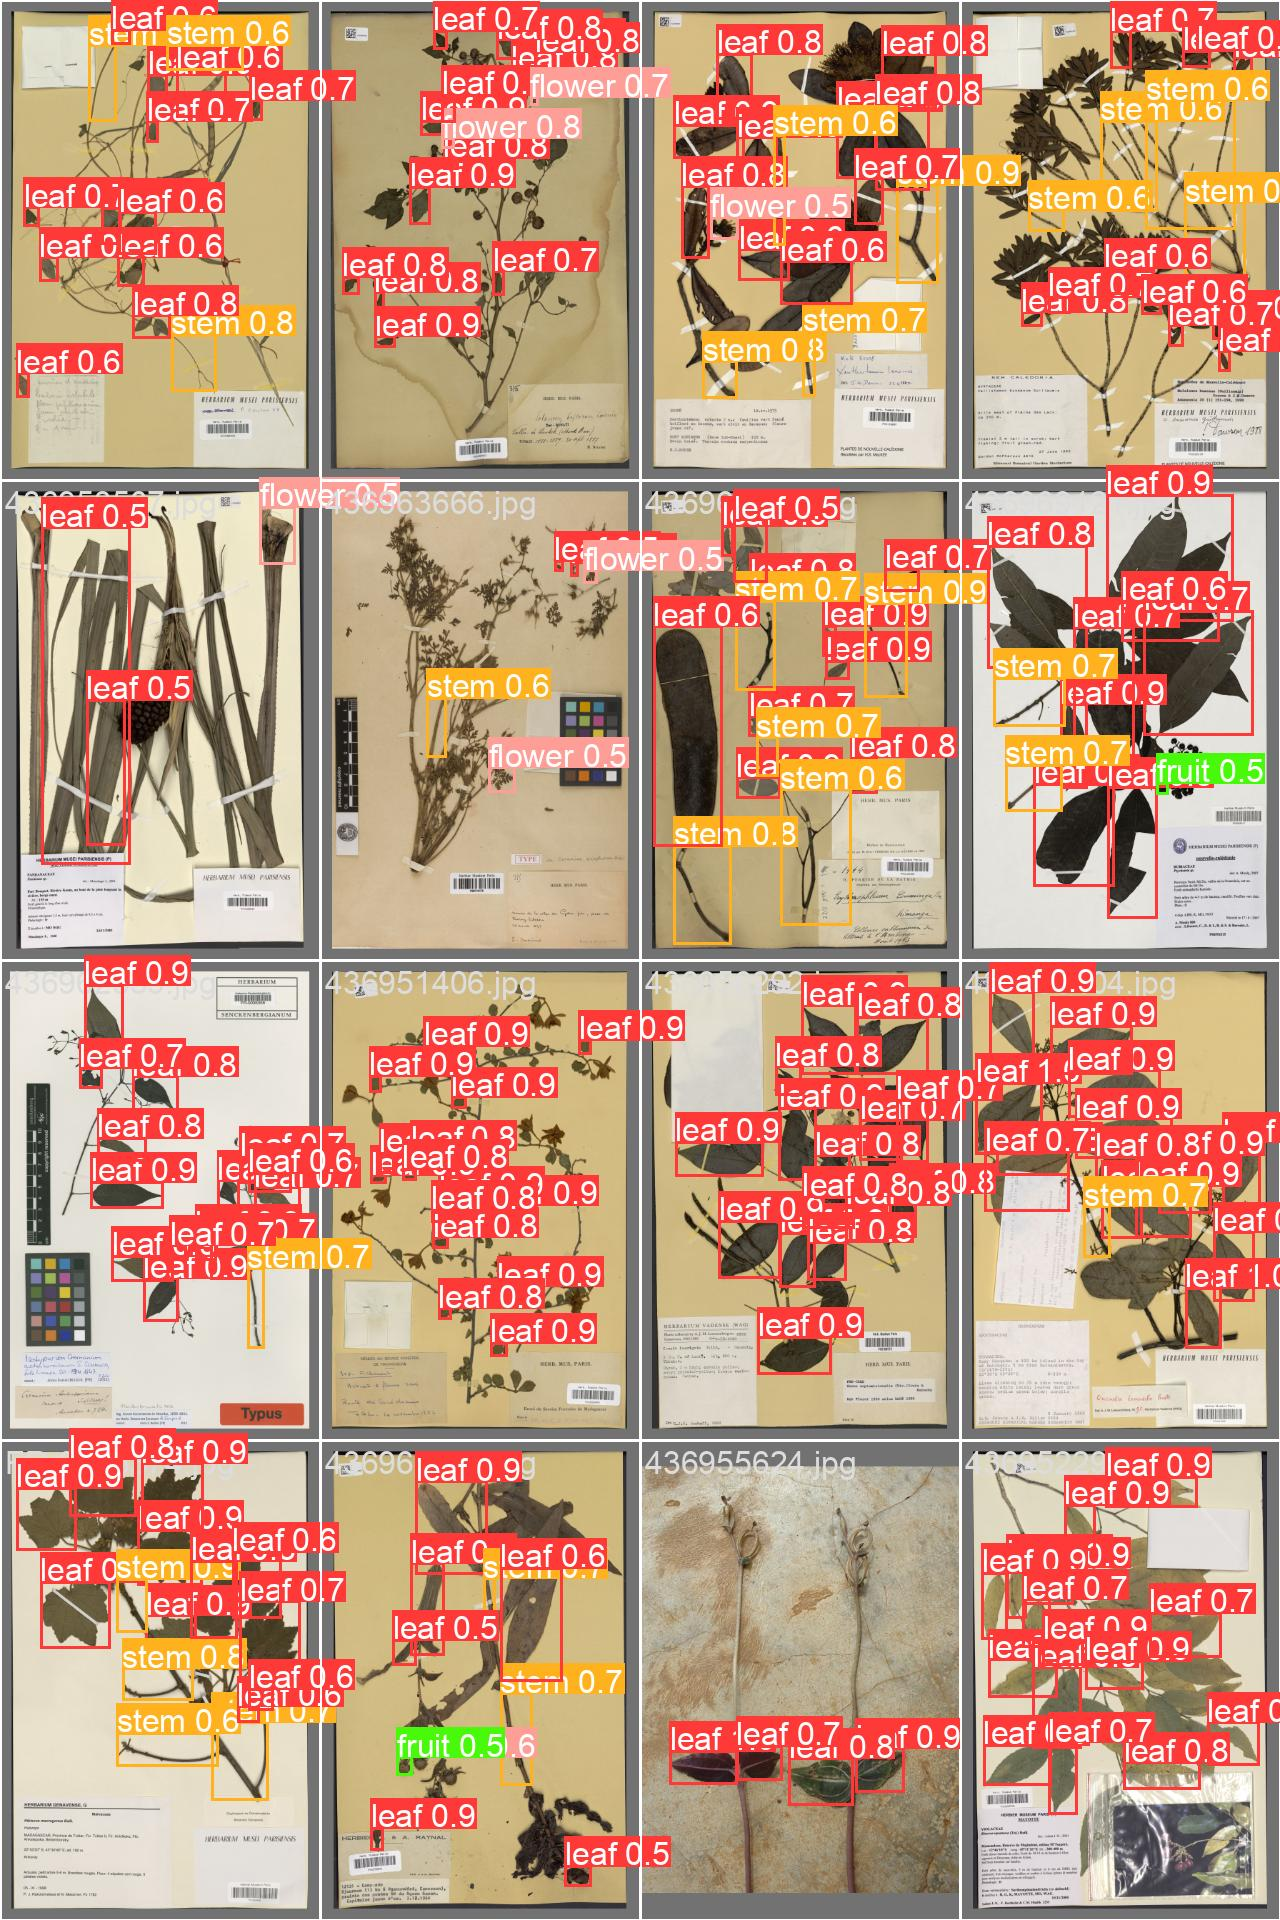

In [28]:
# displying ground truth on test data
Image(filename='/kaggle/working/runs/detect/val/val_batch2_pred.jpg', width=900)